## EEG Eye State dataset

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after analysing the video frames. '1' indicates the eye-closed and '0' the eye-open state. All values are in chronological order with the first measured value at the top of the data.

dataset from: https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State

In [1]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

raw_data = loadarff('EEG Eye State.arff')
df = pd.DataFrame(raw_data[0])

In [2]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


In [3]:
df['eyeDetection'].value_counts()

b'0'    8257
b'1'    6723
Name: eyeDetection, dtype: int64

In [4]:
# Convert eyeDetection to binary 0 or 1
df['class'] = 0
df.loc[df['eyeDetection'] == b'1', 'class'] = 1

In [5]:
# Checking for null value
df.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
class           0
dtype: int64

In [6]:
X = df.iloc[:, :-2]
y = df['class']

Text(0.5,1,'Correlation Matrix')

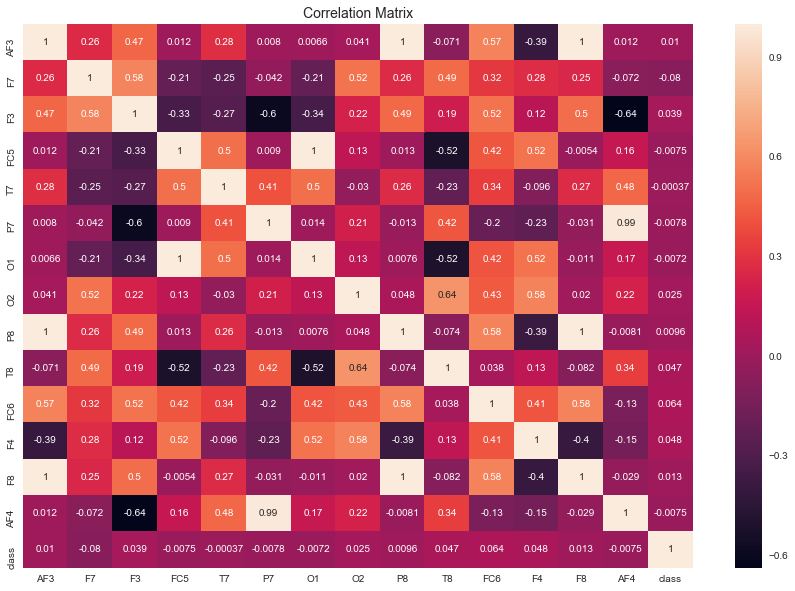

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=14)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
pred = lr.predict(X_train)
print("\nLogistic Regression - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = lr.predict(X_test)
print("\nLogistic Regression - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Logistic Regression - Train accuracy (Eye Detection) 0.64791

Logistic Regression - Test accuracy (Eye Detection) 0.63218


Let's normalize/scale the feature and sees our accuracy improves

In [12]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [13]:
lr.fit(X_train_norm, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
pred = lr.predict(X_train_norm)
print("\nLogistic Regression - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = lr.predict(X_test_norm)
print("\nLogistic Regression - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Logistic Regression - Train accuracy (Eye Detection) 0.56695

Logistic Regression - Test accuracy (Eye Detection) 0.53783


Looks like normalization or standardization doesn't increase our accuracy since these features are already on the same scale.

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

c:\users\o\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
pred = rf.predict(X_train)
print("\nRandom Forest - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = rf.predict(X_test)
print("\nRandom Forest - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Random Forest - Train accuracy (Eye Detection) 1.0

Random Forest - Test accuracy (Eye Detection) 0.91478


Our data does better with RandomForest as our model.
Possible assumption:
-  There isn't a linear trend with our data at hand
-  Need non-linear classifier

### Decision Tree 

In [17]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
prediction_dtc = model_dtc.predict(X_test)
print('Decison Tree accuracy: ', accuracy_score(prediction_dtc, y_test))

Decison Tree accuracy:  0.830663106364041


### K-Nearest neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)
knn.fit(X_train, y_train)

pred = knn.predict(X_train)
print("\nRandom Forest - Train accuracy (Eye Detection)", round(accuracy_score(y_train, pred), 5))

pred = knn.predict(X_test)
print("\nRandom Forest - Test accuracy (Eye Detection)", round(accuracy_score(y_test, pred), 5))


Random Forest - Train accuracy (Eye Detection) 0.9815

Random Forest - Test accuracy (Eye Detection) 0.96462


## Feature Importances

Running our feature importances from RF to determine which features contributes the most to our model

In [19]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
 6) O1                             0.120263
 5) P7                             0.107375
 1) F7                             0.088277
12) F8                             0.081413
13) AF4                            0.080168
 0) AF3                            0.073849
11) F4                             0.062774
 3) FC5                            0.060112
10) FC6                            0.058436
 7) O2                             0.056643
 9) T8                             0.055841
 4) T7                             0.054281
 2) F3                             0.053182
 8) P8                             0.047385


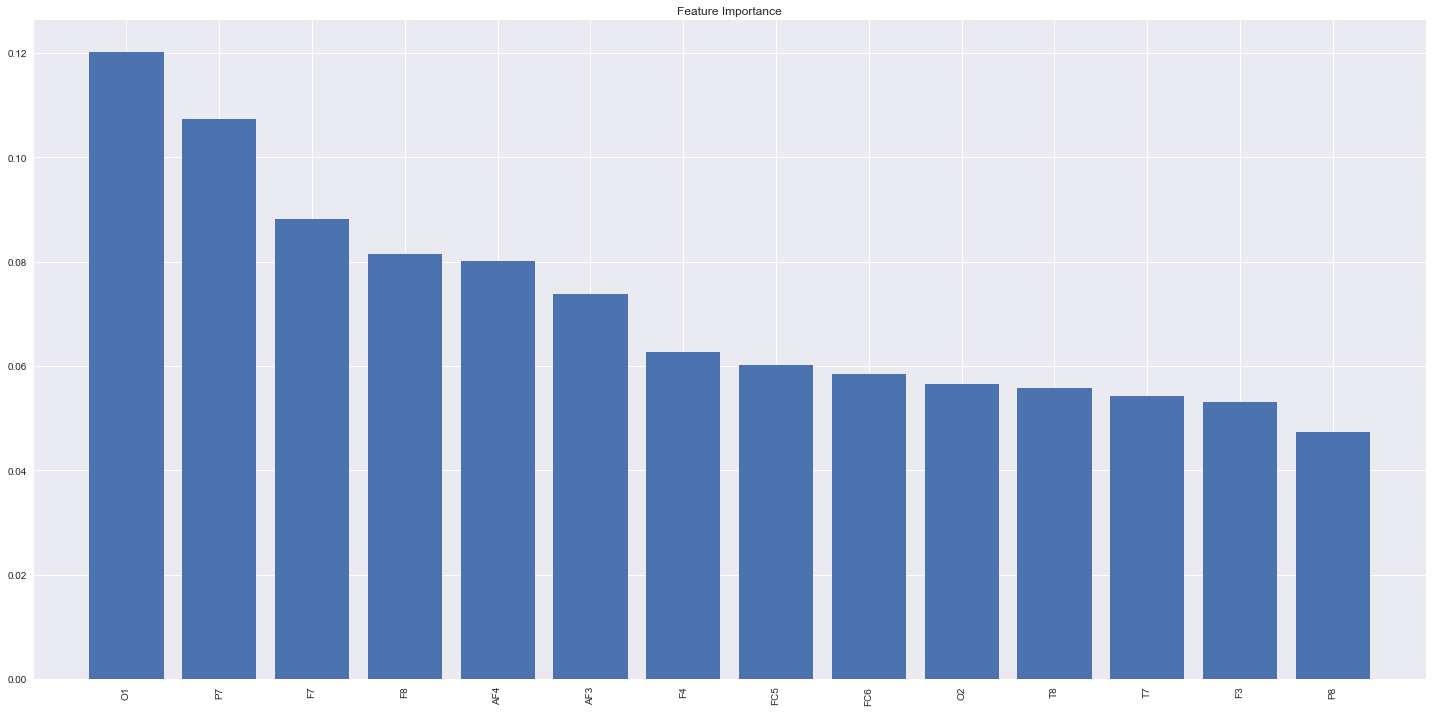

In [20]:
plt.figure(figsize=(20, 10))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X_train, y_train)